In [137]:
!pip install seaborn --upgrade

   ---------------------------------------- 0.0/294.9 kB ? eta -:--:--
   - -------------------------------------- 10.2/294.9 kB ? eta -:--:--
   ---- ---------------------------------- 30.7/294.9 kB 262.6 kB/s eta 0:00:02
   -------- ------------------------------ 61.4/294.9 kB 465.5 kB/s eta 0:00:01
   ------------------ ------------------- 143.4/294.9 kB 774.0 kB/s eta 0:00:01
   ------------------------------ --------- 225.3/294.9 kB 1.1 MB/s eta 0:00:01
   ---------------------------------------- 294.9/294.9 kB 1.1 MB/s eta 0:00:00
  Attempting uninstall: seaborn
    Found existing installation: seaborn 0.12.2
    Uninstalling seaborn-0.12.2:
      Successfully uninstalled seaborn-0.12.2


In [5]:
import pandas as pd
import numpy as np
import seaborn as sns

import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import matplotlib
plt.style.use('ggplot')
from matplotlib.pyplot import figure

%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (12,8)

pd.options.mode.chained_assignment = None

# Read in data
df = pd.read_csv(r'C:\Users\marti\OneDrive\Documents\Data Analysis 2024\1. SQL Data Exploration (1-4)\4. python\movies.csv')

In [6]:
# Let's look at the data
df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0


In [7]:
# Find any missing data
for col in df.columns:
    pct_missing = np.mean(df[col].isnull())
    print('{} - {}%'.format(col, pct_missing))

name - 0.0%
rating - 0.010041731872717789%
genre - 0.0%
year - 0.0%
released - 0.0002608242044861763%
score - 0.0003912363067292645%
votes - 0.0003912363067292645%
director - 0.0%
writer - 0.0003912363067292645%
star - 0.00013041210224308815%
country - 0.0003912363067292645%
budget - 0.2831246739697444%
gross - 0.02464788732394366%
company - 0.002217005738132499%
runtime - 0.0005216484089723526%


In [8]:
# Data types for columns
df.dtypes

name         object
rating       object
genre        object
year          int64
released     object
score       float64
votes       float64
director     object
writer       object
star         object
country      object
budget      float64
gross       float64
company      object
runtime     float64
dtype: object

In [9]:
# Display initial DataFrame information
print("Before changes:")
print(df.info())  # Display information about the DataFrame
print(df.head())  # Display the first few rows of the DataFrame

# Convert 'budget' and 'gross' columns to int64
df['budget'] = df['budget'].astype('int64')
df['gross'] = df['gross'].astype('int64')

# Display updated DataFrame information to confirm the change
print("After changes:")
print(df.info())  # Display updated information about the DataFrame
print(df.head())  # Display the first few rows of the updated DataFrame

# Verify if the conversion was successful
print("Data types after conversion:")
print(df.dtypes)  # Display the data types of each column

Before changes:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7668 entries, 0 to 7667
Data columns (total 15 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   name      7668 non-null   object 
 1   rating    7591 non-null   object 
 2   genre     7668 non-null   object 
 3   year      7668 non-null   int64  
 4   released  7666 non-null   object 
 5   score     7665 non-null   float64
 6   votes     7665 non-null   float64
 7   director  7668 non-null   object 
 8   writer    7665 non-null   object 
 9   star      7667 non-null   object 
 10  country   7665 non-null   object 
 11  budget    5497 non-null   float64
 12  gross     7479 non-null   float64
 13  company   7651 non-null   object 
 14  runtime   7664 non-null   float64
dtypes: float64(5), int64(1), object(9)
memory usage: 898.7+ KB
None
                                             name rating      genre  year  \
0                                     The Shining      R      Drama 

IntCastingNaNError: Cannot convert non-finite values (NA or inf) to integer

In [ ]:
df

In [10]:
# Extract the year from the 'released' column using a regular expression
df['yearcorrect'] = df['released'].str.extract(r'(\d{4})')

# Display the DataFrame to verify the changes
df

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,yearcorrect
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0,1980
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0,1980
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0,1980
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0,1980
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0,1980
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7663,More to Life,NaN,Drama,2020,"October 23, 2020 (United States)",3.1,18.0,Joseph Ebanks,Joseph Ebanks,Shannon Bond,United States,7000.0,NaN,NaN,90.0,2020
7664,Dream Round,NaN,Comedy,2020,"February 7, 2020 (United States)",4.7,36.0,Dusty Dukatz,Lisa Huston,Michael Saquella,United States,NaN,NaN,Cactus Blue Entertainment,90.0,2020
7665,Saving Mbango,NaN,Drama,2020,"April 27, 2020 (Cameroon)",5.7,29.0,Nkanya Nkwai,Lynno Lovert,Onyama Laura,United States,58750.0,NaN,Embi Productions,NaN,2020
7666,It's Just Us,NaN,Drama,2020,"October 1, 2020 (United States)",NaN,NaN,James Randall,James Randall,Christina Roz,United States,15000.0,NaN,NaN,120.0,2020


In [11]:
df = df.sort_values(by=['gross'], inplace=False, ascending=False)

In [12]:
pd.set_option('display.max_rows', None)

In [13]:
# Drop any duplicates
df['company'].drop_duplicates().sort_values(ascending=False)

7129                                              thefyzz
5664                                          micro_scope
6412                             iDeal Partners Film Fund
4007                                             i5 Films
6793                                           i am OTHER
6420                                                 erbp
3776                                       double A Films
524                             Zupnik-Curtis Enterprises
3330                          Zucker Brothers Productions
520                                      Zoetrope Studios
2213                                   Zeta Entertainment
6222                        Zentropa International Norway
3698                              Zentropa Entertainments
1175                                 Zenith Entertainment
5180                                      Zazen Produções
3193                                          ZapPictures
1321                             Zanuck/Brown Productions
1329          

<function matplotlib.pyplot.show(close=None, block=None)>

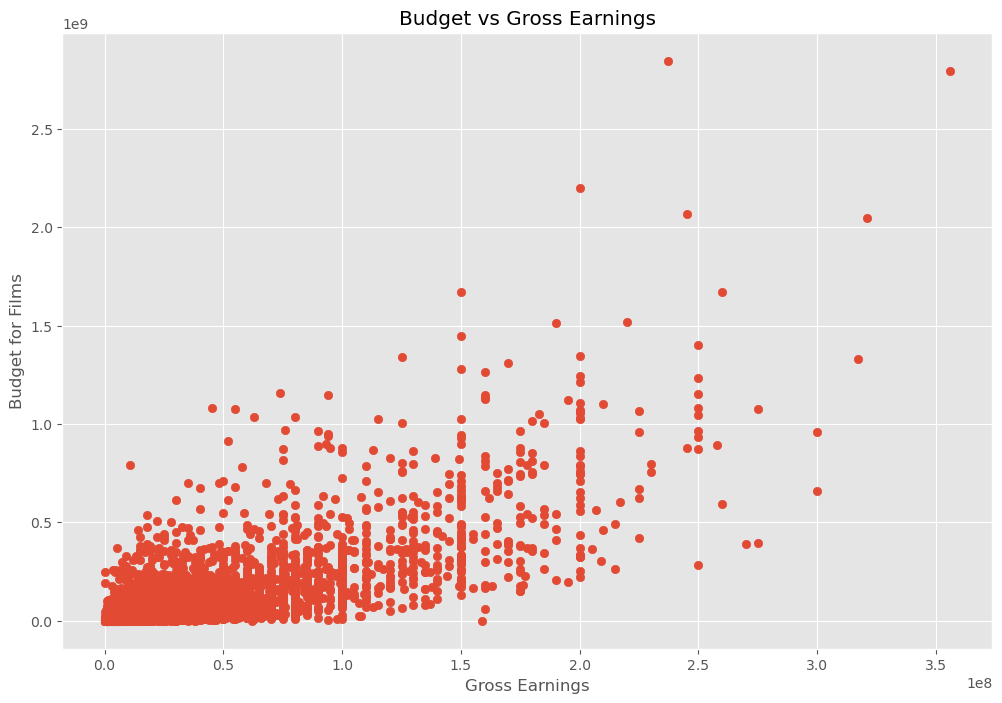

In [14]:
# Scatter plot with budget vs gross revenue
plt.scatter(x=df['budget'], y=df['gross'])
plt.title('Budget vs Gross Earnings')
plt.xlabel('Gross Earnings')
plt.ylabel('Budget for Films')

plt.show

In [15]:
df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,yearcorrect
5445,Avatar,PG-13,Action,2009,"December 18, 2009 (United States)",7.8,1100000.0,James Cameron,James Cameron,Sam Worthington,United States,237000000.0,2.847246e+09,Twentieth Century Fox,162.0,2009
7445,Avengers: Endgame,PG-13,Action,2019,"April 26, 2019 (United States)",8.4,903000.0,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,356000000.0,2.797501e+09,Marvel Studios,181.0,2019
3045,Titanic,PG-13,Drama,1997,"December 19, 1997 (United States)",7.8,1100000.0,James Cameron,James Cameron,Leonardo DiCaprio,United States,200000000.0,2.201647e+09,Twentieth Century Fox,194.0,1997
6663,Star Wars: Episode VII - The Force Awakens,PG-13,Action,2015,"December 18, 2015 (United States)",7.8,876000.0,J.J. Abrams,Lawrence Kasdan,Daisy Ridley,United States,245000000.0,2.069522e+09,Lucasfilm,138.0,2015
7244,Avengers: Infinity War,PG-13,Action,2018,"April 27, 2018 (United States)",8.4,897000.0,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,321000000.0,2.048360e+09,Marvel Studios,149.0,2018


<Axes: xlabel='budget', ylabel='gross'>

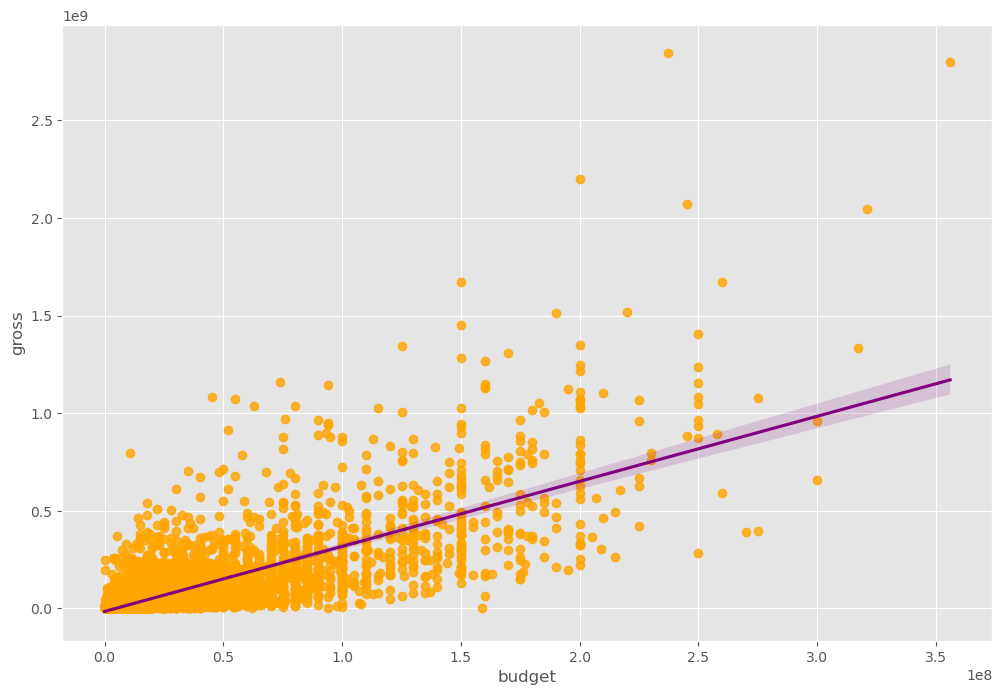

In [16]:
# Plot the Budget vs Gross using Seaborn
sns.regplot(x='budget', y='gross', data=df,scatter_kws={"color": "orange"}, line_kws={"color": "purple"})

In [17]:
# Correlation
# Select only numeric columns
numeric_df = df.select_dtypes(include=[np.number])

# Calculate the correlation matrix for the numeric columns
correlation_matrix = numeric_df.corr()

# Display the correlation matrix
print(correlation_matrix)

             year     score     votes    budget     gross   runtime
year     1.000000  0.097995  0.222945  0.329321  0.257486  0.120811
score    0.097995  1.000000  0.409182  0.076254  0.186258  0.399451
votes    0.222945  0.409182  1.000000  0.442429  0.630757  0.309212
budget   0.329321  0.076254  0.442429  1.000000  0.740395  0.320447
gross    0.257486  0.186258  0.630757  0.740395  1.000000  0.245216
runtime  0.120811  0.399451  0.309212  0.320447  0.245216  1.000000


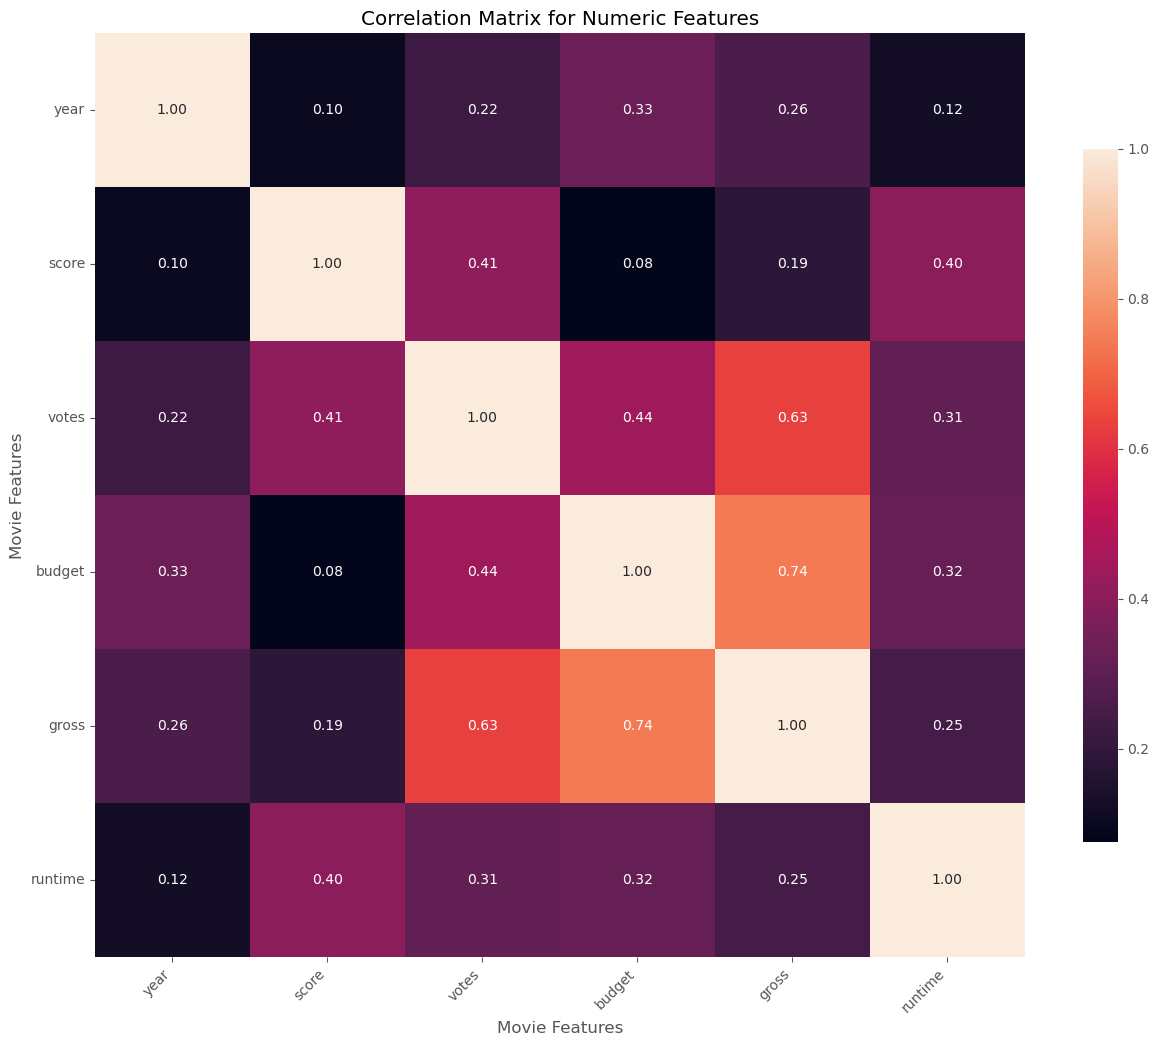

In [18]:
# Calculate the correlation matrix for numeric columns
correlation_matrix = df.corr(numeric_only=True)

# Plot the heatmap with a larger figure size and adjusted annotation size
plt.figure(figsize=(15, 12))  # Increase the figure size
heatmap = sns.heatmap(correlation_matrix, annot=True, fmt='.2f', annot_kws={"size": 10}, cbar_kws={"shrink": 0.75})
plt.title('Correlation Matrix for Numeric Features')
plt.xlabel('Movie Features')
plt.ylabel('Movie Features')

# Rotate the x-axis labels for better visibility
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)

plt.show()

In [19]:
# Using factorize - this assigns a random numeric value for each unique categorical value

df.apply(lambda x: x.factorize()[0]).corr(method='pearson')

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,yearcorrect
name,1.000000,0.303922,0.138277,0.253700,0.654899,0.106870,0.595689,0.720202,0.782882,0.652837,0.190609,0.026200,0.843755,0.682841,0.071804,0.246515
rating,0.303922,1.000000,-0.012156,0.037943,0.237100,-0.065634,0.118085,0.235022,0.255885,0.243614,0.158866,0.052863,0.295403,0.278954,0.033214,0.026917
genre,0.138277,-0.012156,1.000000,0.087977,0.091299,0.063222,0.148277,0.093275,0.088035,0.097916,-0.073886,0.083745,0.122942,0.058861,0.005585,0.084575
year,0.253700,0.037943,0.087977,1.000000,0.315877,0.076737,0.326421,0.173060,0.212142,0.227367,-0.053610,0.030935,0.186974,0.121022,0.032916,0.940309
released,0.654899,0.237100,0.091299,0.315877,1.000000,0.069151,0.449956,0.502859,0.547903,0.476305,0.162029,0.016701,0.561106,0.465610,0.048243,0.319690
score,0.106870,-0.065634,0.063222,0.076737,0.069151,1.000000,0.233450,0.149505,0.103718,0.106059,-0.098456,-0.000201,0.082754,0.035989,0.035609,0.084386
votes,0.595689,0.118085,0.148277,0.326421,0.449956,0.233450,1.000000,0.495072,0.521099,0.451202,0.050641,-0.020308,0.504208,0.390436,0.067556,0.321011
director,0.720202,0.235022,0.093275,0.173060,0.502859,0.149505,0.495072,1.000000,0.696047,0.580143,0.197047,-0.031082,0.596073,0.614240,0.080107,0.169507
writer,0.782882,0.255885,0.088035,0.212142,0.547903,0.103718,0.521099,0.696047,1.000000,0.589925,0.201831,-0.010439,0.662051,0.615928,0.057742,0.206438
star,0.652837,0.243614,0.097916,0.227367,0.476305,0.106059,0.451202,0.580143,0.589925,1.000000,0.221224,-0.006390,0.516135,0.569651,0.072540,0.225253


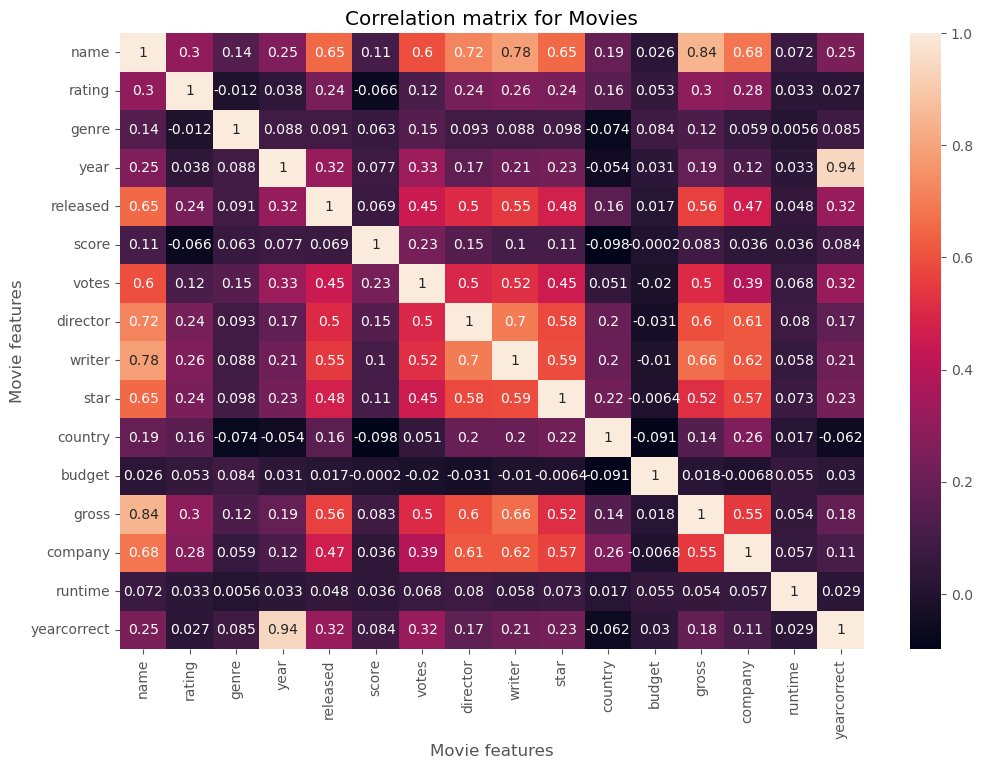

In [20]:
# Calculate the correlation matrix for numeric columns
correlation_matrix = df.apply(lambda x: x.factorize()[0]).corr(method='pearson')

sns.heatmap(correlation_matrix, annot = True)

plt.title("Correlation matrix for Movies")
plt.xlabel("Movie features")
plt.ylabel("Movie features")

plt.show()

In [22]:
correlation_mat = df.apply(lambda x: x.factorize()[0]).corr(method='pearson').corr()
corr_pairs = correlation_mat.unstack()
corr_pairs

name         name           1.000000
             rating         0.333734
             genre         -0.124158
             year           0.028521
             released       0.847420
             score         -0.117717
             votes          0.756324
             director       0.920296
             writer         0.956222
             star           0.863931
             country        0.198060
             budget        -0.390089
             gross          0.970652
             company        0.884505
             runtime       -0.260340
             yearcorrect    0.023803
rating       name           0.333734
             rating         1.000000
             genre         -0.276756
             year          -0.247324
             released       0.262236
             score         -0.374513
             votes          0.025242
             director       0.287293
             writer         0.311830
             star           0.290285
             country        0.250251
 

In [23]:
sorted_pairs = corr_pairs.sort_values()
sorted_pairs

director     budget        -0.434660
budget       director      -0.434660
             star          -0.420885
star         budget        -0.420885
votes        budget        -0.415709
budget       votes         -0.415709
writer       budget        -0.410752
budget       writer        -0.410752
name         budget        -0.390089
budget       name          -0.390089
company      budget        -0.384821
budget       company       -0.384821
rating       score         -0.374513
score        rating        -0.374513
budget       released      -0.374167
released     budget        -0.374167
country      score         -0.369900
score        country       -0.369900
country      yearcorrect   -0.365691
yearcorrect  country       -0.365691
year         country       -0.359191
country      year          -0.359191
gross        budget        -0.355688
budget       gross         -0.355688
country      budget        -0.349288
budget       country       -0.349288
genre        country       -0.344067
c

In [24]:
high_corr = sorted_pairs[(sorted_pairs) > 0.5]
high_corr

company      votes          0.572240
votes        company        0.572240
             star           0.655016
star         votes          0.655016
released     votes          0.671636
votes        released       0.671636
             director       0.700905
director     votes          0.700905
company      released       0.707747
released     company        0.707747
votes        gross          0.709103
gross        votes          0.709103
votes        writer         0.724327
writer       votes          0.724327
released     star           0.725785
star         released       0.725785
released     director       0.748483
director     released       0.748483
name         votes          0.756324
votes        name           0.756324
gross        star           0.787853
star         gross          0.787853
released     writer         0.795173
writer       released       0.795173
gross        released       0.804445
released     gross          0.804445
gross        company        0.820940
c

In [25]:
# Votes and Budget has the highest correlation to Gross Earnings.
# Company has low correlation.